# **IPC Chile 1922-2025 Analisis exploratorio y Visualización**
## Objetivo: Comprender la evolución del IPC y sus características estadísticas.

### El objetivo se desglosará respondiendo las siguientes preguntas:


* ¿Cómo ha sido la variación mensual del IPC a lo largo de la historia
registrada en los datos?

* ¿Cuáles fueron los 5 años de mayor y menor inflación en Chile según este indicador?

* ¿Existen décadas o periodos presidenciales que muestren un comportamiento inflacionario marcadamente diferente?

* ¿Cuál es la distribución estadística de la variación del IPC? ¿Es simétrica? ¿Tiene valores extremos (outliers)?





In [14]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_excel('Indicador.xls', skiprows=3)

In [16]:
df.head()

,Mes,Valor
0,1928-03-01,0.0
1,1928-04-01,2.0
2,1928-05-01,3.9
3,1928-06-01,1.9
4,1928-07-01,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mes     1171 non-null   datetime64[ns]
 1   Valor   1171 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.4 KB


In [18]:
df.columns = ['Fecha', 'Variacion_IPC']
df

,Fecha,Variacion_IPC
0,1928-03-01,0.0
1,1928-04-01,2.0
2,1928-05-01,3.9
3,1928-06-01,1.9
4,1928-07-01,0.0
...,...,...
1166,2025-05-01,0.2
1167,2025-06-01,-0.4
1168,2025-07-01,0.9
1169,2025-08-01,0.0


In [19]:
#Verificamos si hay valores nulos
print(df.isnull().sum())

Fecha            0
Variacion_IPC    0
dtype: int64


In [20]:
#Estadísticas descriptivas
df['Variacion_IPC'].describe()

,Variacion_IPC
count,1171.000000
mean,1.773954
std,4.016895
min,-10.900000
25%,0.200000
50%,0.900000
75%,2.300000
max,87.600000


**📈 Interpretación general:**

*El IPC chileno ha sido positivo la mayor parte del tiempo (inflación mensual moderada).

*La alta desviación estándar (4.0) y el máximo tan elevado (87.6) indican que el país tuvo episodios de inflación extrema.

*La mediana de 0.9% muestra que, fuera de esos períodos de crisis, la inflación mensual típica es baja o moderada.

## Visualización de la Serie Temporal

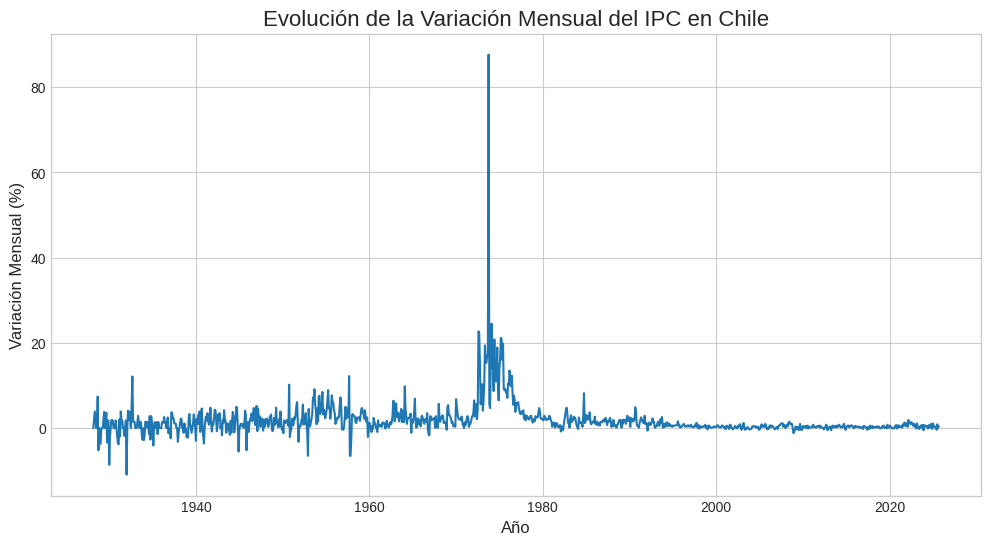

In [21]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Variacion_IPC', data=df)

plt.title('Evolución de la Variación Mensual del IPC en Chile', fontsize= 16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Variación Mensual (%)', fontsize=12)
plt.show()

## Análisis de la Distribución

/tmp/ipython-input-117538491.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


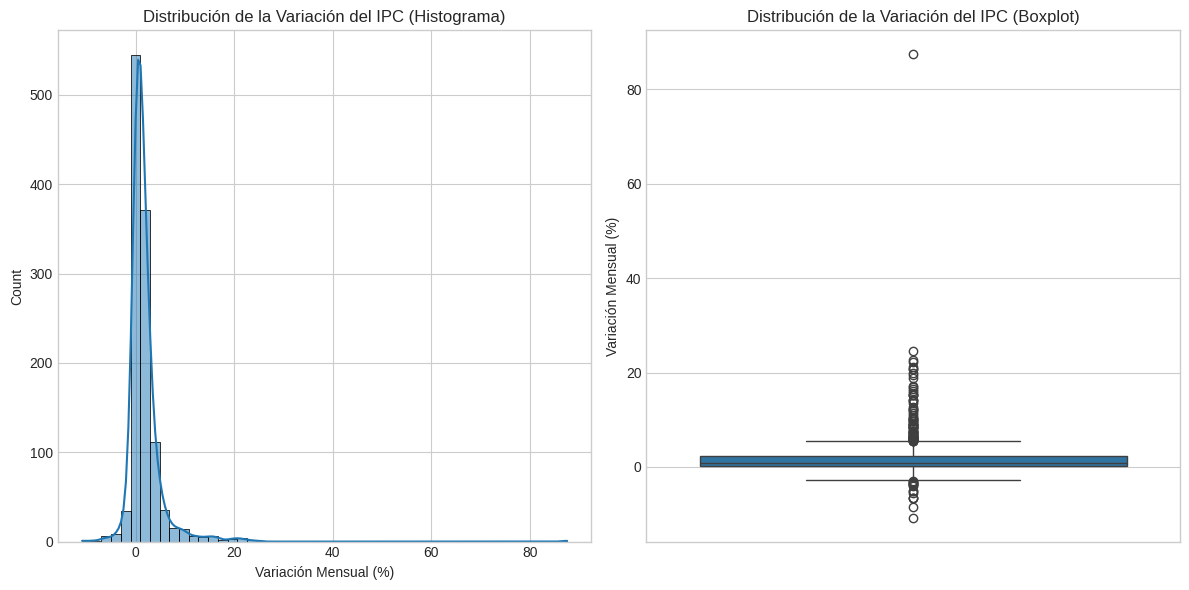

In [22]:
plt.figure(figsize=(12,6))
#Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['Variacion_IPC'], kde=True, bins=50)
plt.title('Distribución de la Variación del IPC (Histograma)')
plt.xlabel('Variación Mensual (%)')

plt.legend()

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df['Variacion_IPC'])
plt.title('Distribución de la Variación del IPC (Boxplot)')
plt.ylabel('Variación Mensual (%)')

plt.tight_layout()
plt.show()

🧭 1️⃣ Interpretación del histograma (izquierda)

La inflación mensual en Chile ha sido estable la mayor parte del tiempo, pero con algunos meses de hiperinflación que distorsionan la escala del gráfico.

🧭 2️⃣ Interpretación del boxplot (derecha)

El IPC tiene una distribución muy sesgada hacia arriba, con outliers que representan eventos excepcionales (crisis económicas, ajustes de precios o periodos de hiperinflación).

## Creación de Características y Agregación de Datos (Feature Engineering)

Pasaremos de tener solo datos mensuales a poder agruparlos y compararlos por año.

* Extraeremos Componentes de la Fecha.
* Calcularemos la Inflación Anual.
* Identificaremos los Años Claves.

In [23]:
#Extraer Año y Mes
df['Año'] = df['Fecha'].dt.year
df.head()

,Fecha,Variacion_IPC,Año
0,1928-03-01,0.0,1928
1,1928-04-01,2.0,1928
2,1928-05-01,3.9,1928
3,1928-06-01,1.9,1928
4,1928-07-01,0.0,1928


In [24]:
#Calcular la inflación anual
#Convertimos la variación porcentual a un factor de crecimiento
df['Factor_Crecimiento'] = 1 + (df['Variacion_IPC'] / 100)

#Agrupamos por año y multiplicamos todos los factores de crecimiento de ese año
inflacion_anual = df.groupby('Año')['Factor_Crecimiento'].prod()

#Convertimos el producto acumulado de vuelta a porcentaje
inflacion_anual = (inflacion_anual - 1) * 100

#Convertimos la serie resultante a un DF para manejarlo mejor
df_anual = inflacion_anual.reset_index()
df_anual.columns = ['Año', 'Inflacion_Anual_Compuesta']

In [25]:
#Identificamos los años clave
#Ordenamos los valores para ver los años de mayor inflación.
top_5_mayor_inflacion = df_anual.sort_values(by='Inflacion_Anual_Compuesta', ascending=False).head(5)
print(top_5_mayor_inflacion)

     Año  Inflacion_Anual_Compuesta
45  1973                 508.310420
46  1974                 375.883326
47  1975                 340.809256
48  1976                 174.166723
44  1972                 163.548627


🧭 Conclusión económica

Entre 1972 y 1976, Chile vivió su peor crisis inflacionaria del siglo XX, con niveles de inflación superiores al 100% anual durante cinco años consecutivos.

El pico fue 1973, con más de 500% anual.

Esto significa que los precios se multiplicaban cada pocos meses, destruyendo el poder adquisitivo.

A partir de 1977–1978, la inflación comenzó a controlarse gradualmente hasta estabilizarse por debajo del 30% anual en los años siguientes.

In [26]:
#Ordenamos los valores para ver los años con menor inflación.
top_5_menor_inflacion = df_anual.sort_values(by='Inflacion_Anual_Compuesta', ascending=True).head(5)
print(top_5_menor_inflacion)

     Año  Inflacion_Anual_Compuesta
2   1930                  -5.251877
81  2009                  -1.601235
7   1935                  -1.415330
3   1931                  -0.018866
75  2003                   1.093152


En resumen:

Los valores negativos de tu variable Inflacion_Anual_Compuesta indican años de deflación, donde los precios promedio bajaron. Esto suele ocurrir en crisis económicas profundas o en periodos de muy baja demanda.

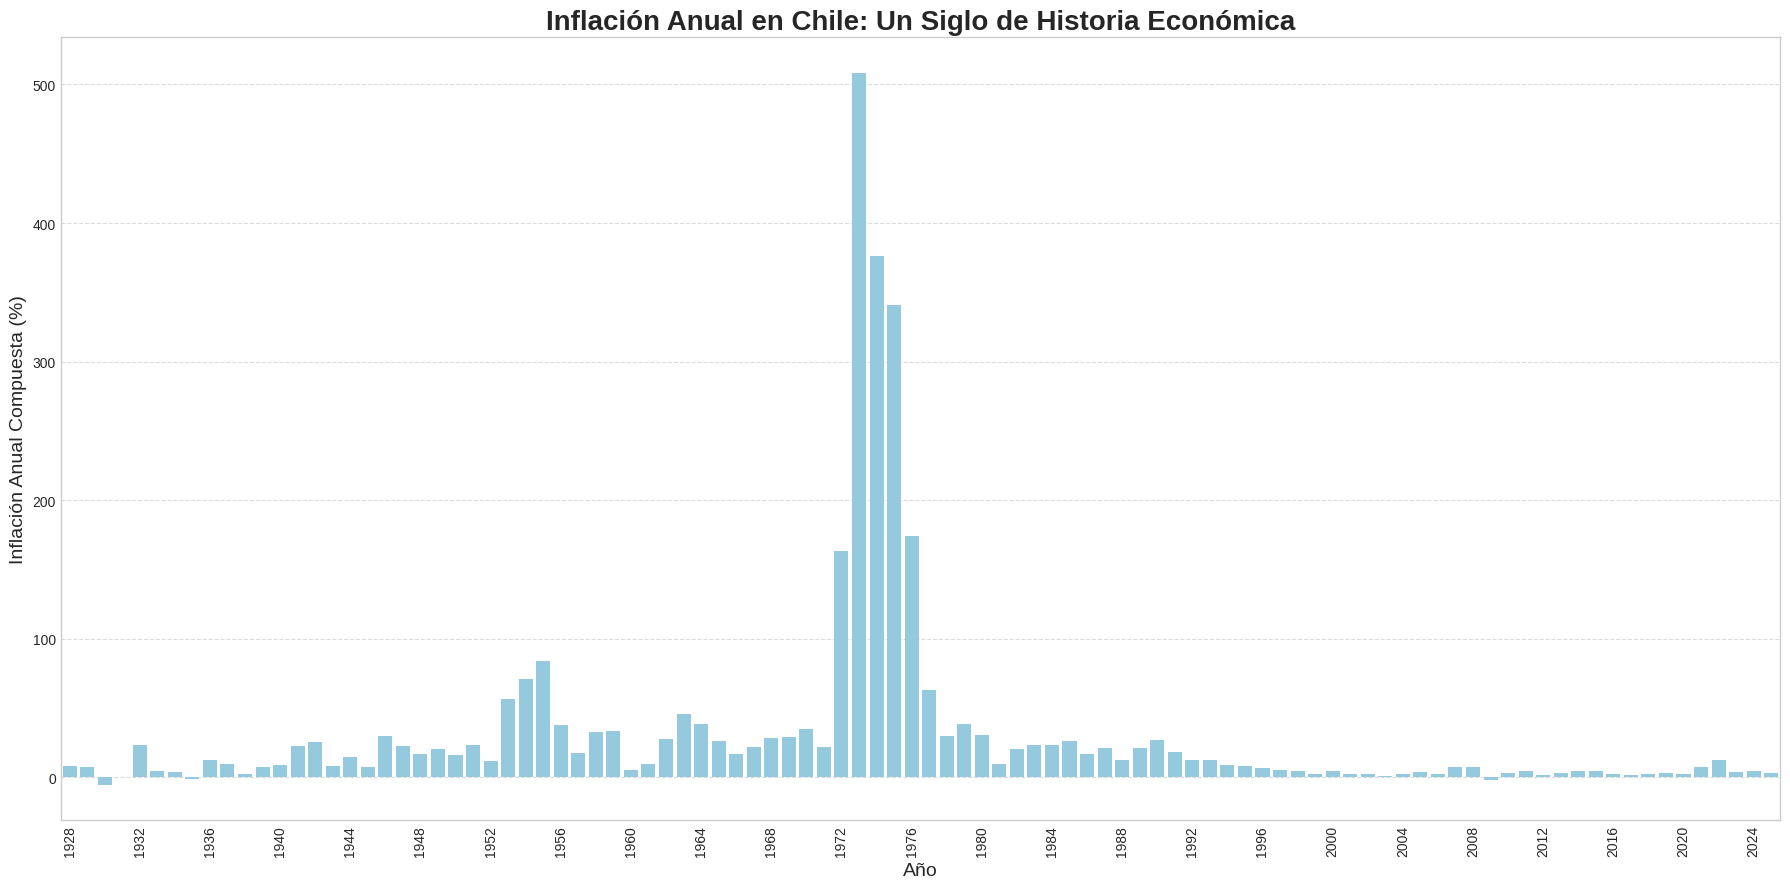

In [29]:
año_max_inflacion = df_anual.loc[df_anual['Inflacion_Anual_Compuesta'].idxmax()]

plt.figure(figsize=(18, 9))
plot = sns.barplot(x='Año', y='Inflacion_Anual_Compuesta', data=df_anual, color='skyblue')

plt.title('Inflación Anual en Chile: Un Siglo de Historia Económica', fontsize=20, weight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Inflación Anual Compuesta (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Añadimos una anotación para destacar el punto más importante.
plt.annotate(
    f"Pico histórico\n{año_max_inflacion['Año']}: {año_max_inflacion['Inflacion_Anual_Compuesta']:.0f}%",
    xy=(año_max_inflacion['Año'], año_max_inflacion['Inflacion_Anual_Compuesta']),
    xytext=(año_max_inflacion['Año'], año_max_inflacion['Inflacion_Anual_Compuesta'] + 50),
    arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='center',
    fontsize=12,
    weight='bold'
)

# Para que el eje X sea legible
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=25))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()